# Assigment III

Samer Abufoul \
Manor Nir

### Importing required libraries

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay 
from keras.models import Sequential
from keras.layers import Dropout, Conv1D, Flatten, Dense, Embedding, SpatialDropout1D,  MaxPooling1D, GlobalMaxPooling1D
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer 
from nltk.stem import PorterStemmer 


In [178]:
train_df = pd.read_csv('https://github.com/odedovadia/AdvancedMLDLCourse/blob/main/Assignments/Assignment%20III/train.csv?raw=true')
test_df = pd.read_csv('https://github.com/odedovadia/AdvancedMLDLCourse/blob/main/Assignments/Assignment%20III/test.csv?raw=true')

In [179]:
tf.random.set_seed(75)

## Exploring the data

In [180]:
train_df.head()

,Dialogue,Character,Episode,Show,Dialogue_length
0,Hey.,joey,Season-07 Episode-13-The One Where Rosita Dies,Friends,1
1,(to Joey) Are you gonna be embarrassed going ...,phoebe,Season-10 Episode-04-The One With The Cake,Friends,13
2,"Me? No no no, you. You're gonna tell him. I'm ...",elaine,S03E22,Seinfeld,14
3,Alright you guys are off to party number one ...,chandler,Season-02 Episode-22-The One With the Two Parties,Friends,56
4,Am I? Or am I so sane that you just blew your ...,kramer,S05E12,Seinfeld,13


Checking the number of values for every class:

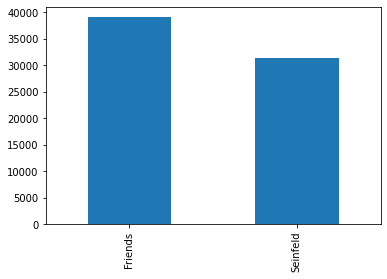

In [181]:
train_df["Show"].value_counts().plot(kind="bar")

Exploring the length of every dialogue:

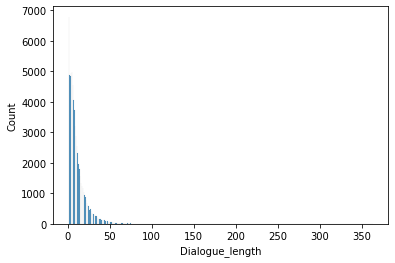

In [182]:
sns.histplot(train_df['Dialogue_length'])

Maximum, Minimum and mean of dialogues length:

In [183]:
max(train_df['Dialogue_length']), min(train_df['Dialogue_length']), np.mean(train_df['Dialogue_length'])

(363, 1, 11.002130530502095)

Distribution of "Character" feature:

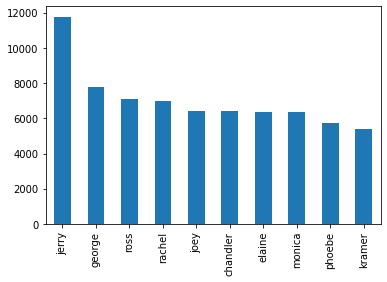

In [184]:
train_df["Character"].value_counts().plot(kind="bar")

Number of samples in training and test sets

In [185]:
train_df.shape

(70405, 5)

In [186]:
test_df.shape

(4245, 5)

## Data preprocessing

We tried to remove special characters and stop words, but doing so reduced the model's accuracy - we decided not to do so

In [187]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [188]:
# def remove_special_characters(text):
#     pattern = r'[^a-zA-Z0-9\s]'
#     text = re.sub(pattern,'',text)
#     return text

In [189]:
# def preprocessing(text):
#   text = remove_special_characters(text)
#   text = text.lower()
#   tokens = tokenizer.tokenize(text)
#   filtered_tokens = [token for token in tokens if token not in stopword_list]
#   filtered_text = ' '.join(filtered_tokens) 
#   return filtered_text

In [190]:
# train_df['Dialogue'] = train_df['Dialogue'].apply(lambda x: preprocessing(x))

In [191]:
# test_df['Dialogue'] = test_df['Dialogue'].apply(lambda x: preprocessing(x))

We decided not to use stemming since it reduced our model's accuracy

In [192]:
# stemmer = PorterStemmer()
# def stem_words(text):
#     return " ".join([stemmer.stem(word) for word in text.split()])

In [193]:
# train_df['Dialogue'] = train_df['Dialogue'].apply(lambda x: stem_words(x))

In [194]:
# test_df['Dialogue'] = test_df['Dialogue'].apply(lambda x: stem_words(x))

Converting 'Show' labels (Friends and Seinfeld) to classes 1 and 0 respectively:

In [195]:
train_df['Show'] = train_df['Show'].map({'Friends':1,'Seinfeld':0})

In [196]:
test_df['Show'] = test_df['Show'].map({'Friends':1,'Seinfeld':0})

###Splitting train data into validation and train

In [197]:
X = train_df['Dialogue']
Y = train_df['Show']

In [198]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.1, random_state=75)

In [199]:
X_test = test_df['Dialogue']
Y_test = test_df['Show']

 ## Logisitc regression<br>
 ### (not for submission)

We tried to run Logistic regression model but the results were poor

TF-IDF Vectorizer

In [200]:
# tfidf = TfidfVectorizer(
#     analyzer='word')  
# x_train_tv = tfidf.fit_transform(x_train)

In [201]:
# x_test_tv = X_test.copy()
# x_test_tv = tfidf.transform(x_test_tv)

In [202]:
# lr_tfidf = LogisticRegression(penalty='l2', max_iter=500, random_state=42)
# lr_tfidf.fit(x_train_tv, y_train.ravel())

In [203]:
# def evaluate(model, model_name, x, y):
#   y_pred = model.predict(x)
#   y_pred_proba = model.predict_proba(x)[:, 1] 

#   AUC = roc_auc_score(y, y_pred_proba)
#   Accuracy =  accuracy_score(y, y_pred)
#   print(model_name)
#   print("Auc score is:",AUC)
#   print("Accuracy score is:",Accuracy)

In [204]:
# evaluate(lr_tfidf, 'logistic regression training set', x_train_tv, y_train)

In [205]:
# evaluate(lr_tfidf, 'logistic regression training set', x_test_tv, Y_test)

## Building a Deep Learning model

In [206]:
x_train_dl = x_train.copy()
x_val_dl = x_val.copy()
x_test_dl = X_test.copy()

In [207]:
token = Tokenizer(lower=False)
token.fit_on_texts(x_train)

Convert to sequences:

In [208]:
x_train_dl = token.texts_to_sequences(x_train_dl)
x_val_dl = token.texts_to_sequences(x_val_dl)
x_test_dl = token.texts_to_sequences(x_test_dl)

Calculate document lengths:

In [209]:
doc_len_list = [len(doc) for doc in x_train_dl]

Longest, shortest, and average document:

In [210]:
max(doc_len_list), min(doc_len_list), np.mean(doc_len_list)

(295, 0, 11.09906255918187)

Let's examine the distribution:

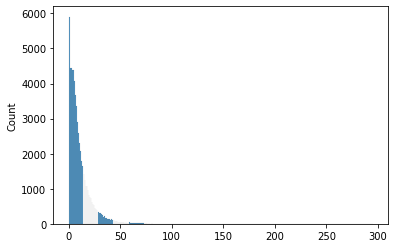

In [211]:
sns.histplot(doc_len_list)

Making sure that all sequences have the same length. As the distribution shows, We put 50 as shared value:

In [212]:
max_words = 50

x_train_dl = tf.keras.preprocessing.sequence.pad_sequences(x_train_dl, maxlen=max_words)
x_val_dl = tf.keras.preprocessing.sequence.pad_sequences(x_val_dl, maxlen=max_words)
x_test_dl = tf.keras.preprocessing.sequence.pad_sequences(x_test_dl, maxlen=max_words)

In [213]:
total_words = len(token.word_index) + 1 
total_words

26469

In [214]:
x_test_dl[9]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    4,  634,  208,
       4878,    1,  483,    7,    4, 2531,   56,   39,  386,   43,  243,
          1, 6352,   45, 4520,  306, 6534], dtype=int32)

In [215]:
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=32, input_length=max_words))
model.add(Conv1D(8, 3, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 32)            847008    
                                                                 
 conv1d_3 (Conv1D)           (None, 50, 8)             776       
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                25664     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 873,513
Trainable params: 873,513
Non-tr

In [216]:
model.fit(x_train_dl, y_train, validation_data=(x_val_dl, y_val), epochs=5, batch_size=64)

Epoch 1/5
991/991 [==============================] - 5s 4ms/step - loss: 0.5103 - accuracy: 0.7151 - val_loss: 0.4250 - val_accuracy: 0.7837
Epoch 2/5
991/991 [==============================] - 4s 4ms/step - loss: 0.3676 - accuracy: 0.8193 - val_loss: 0.4223 - val_accuracy: 0.7867
Epoch 3/5
991/991 [==============================] - 5s 5ms/step - loss: 0.3007 - accuracy: 0.8543 - val_loss: 0.4535 - val_accuracy: 0.7843
Epoch 4/5
991/991 [==============================] - 4s 4ms/step - loss: 0.2545 - accuracy: 0.8767 - val_loss: 0.4919 - val_accuracy: 0.7807
Epoch 5/5
991/991 [==============================] - 4s 4ms/step - loss: 0.2230 - accuracy: 0.8915 - val_loss: 0.5755 - val_accuracy: 0.7780


In [217]:
acc_train_ann = model.evaluate(x_train_dl,y_train)
print('The accuracy on the train set:',acc_train_ann[1])

1981/1981 [==============================] - 5s 2ms/step - loss: 0.1816 - accuracy: 0.9155
The accuracy on the train set: 0.9155356287956238


In [218]:
acc_test_ann = model.evaluate(x_test_dl,Y_test)
print('The accuracy on the test set:',acc_test_ann[1])

133/133 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.8631
The accuracy on the test set: 0.8631330728530884


## Analysis of results

In [219]:
test_df1 = test_df.copy()
test_df1.head()

,Dialogue,Character,Episode,Show,Dialogue_length
0,"Oh my God, that's great! I'm smart!! No, no, ...",joey,Season-10 Episode-05-The One Where Rachel's Si...,1,30
1,"Listen, I’m sure that dad doesn’t care. He pr...",monica,Season-07 Episode-03-The One With Phoebe’s Coo...,1,20
2,Well I am. Couldn't you try to go through some...,george,S09E16,0,18
3,Yes I am. We had a verbal contract. If we can'...,kramer,S07E13,0,20
4,"Um, I straightened out your shower curtain so...",monica,Season-02 Episode-18-The One Where Dr. Remore ...,1,17


In [220]:
test_df1["Character"] = test_df1["Character"].astype("category")

In [221]:
characters = test_df1["Character"].cat.categories

####Confusion matrices for each character in both shows:

13/13 [==============================] - 0s 2ms/step
confusion matrix for chandler


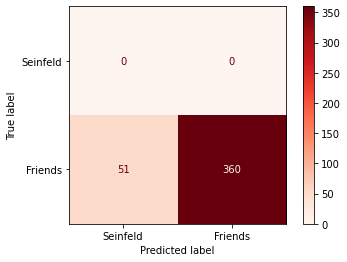

10/10 [==============================] - 0s 2ms/step
confusion matrix for elaine


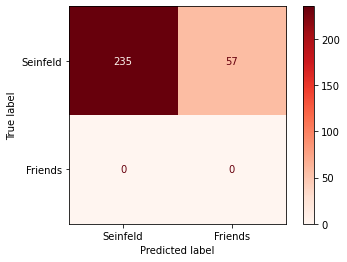

15/15 [==============================] - 0s 2ms/step
confusion matrix for george


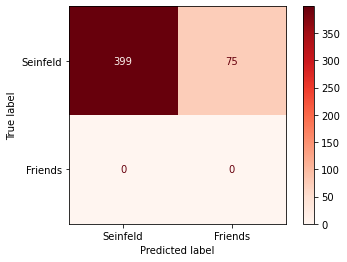

19/19 [==============================] - 0s 2ms/step
confusion matrix for jerry


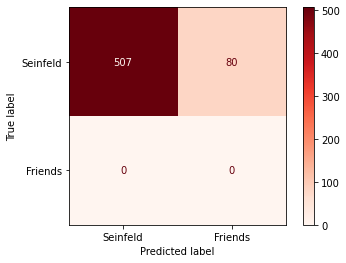

15/15 [==============================] - 0s 2ms/step
confusion matrix for joey


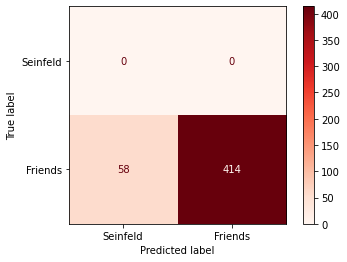

10/10 [==============================] - 0s 2ms/step
confusion matrix for kramer


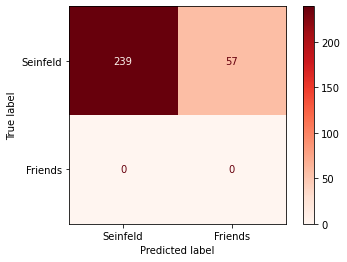

12/12 [==============================] - 0s 2ms/step
confusion matrix for monica


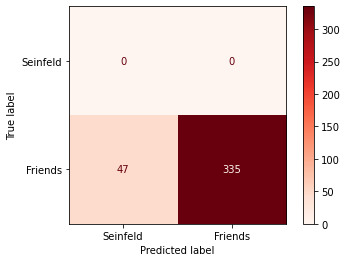

13/13 [==============================] - 0s 2ms/step
confusion matrix for phoebe


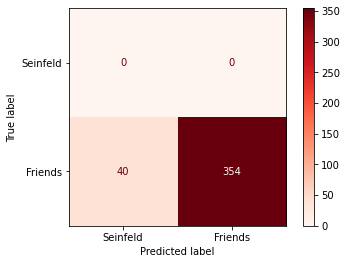

15/15 [==============================] - 0s 2ms/step
confusion matrix for rachel


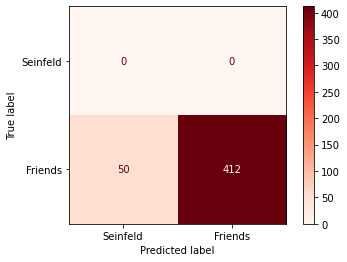

15/15 [==============================] - 0s 2ms/step
confusion matrix for ross


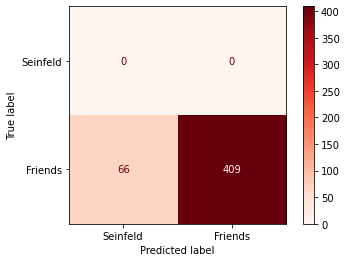

In [222]:
for char in characters:
  df_char = test_df1.loc[test_df1["Character"] == char].copy()
  df_char['Dialogue'] = token.texts_to_sequences(df_char['Dialogue'])
  x_char = tf.keras.preprocessing.sequence.pad_sequences(df_char['Dialogue'], maxlen=max_words)
  y_char = df_char['Show']
  y_predict = model.predict(x_char).round()

  cm= confusion_matrix(y_char, y_predict)
  print('confusion matrix for '+char)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Seinfeld','Friends'])
  disp.plot(cmap=plt.cm.Reds)
  plt.show()

In [223]:
results = {'model': ['ANN model'],
           'Test score (Accuracy)': [0.8653],
           'Train score (Accuracy)': [0.9166],
           'Number of trainable parameters': ['873,513'],
           'Number of layers': [6],
           'Regularization methods': ['Dropout'],
           'Number of epochs': [5],
           'Loss function': ['binary_crossentropy'],
           'Optimizer': ['adam'],
           'Embedding': [32]
           }
results_df = pd.DataFrame(results)
import os
results_df.to_csv(os.path.join(os.getcwd(), 'exercise3.csv'))